In [64]:
import pandas as pd
bollywood_data=pd.read_csv('bollywood.csv',encoding='cp1252')

In [65]:
bollywood_data

,S No,Release Date,Movie Name,Release Date (N / LW / Festive),Genre - Defined,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [66]:
# 1    How many records are present in the dataset? Print the metadata information of the dataset.
bollywood_data.shape
bollywood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   S No                             149 non-null    int64  
 1   Release Date                     149 non-null    object 
 2   Movie Name                       149 non-null    object 
 3   Release Date (N / LW / Festive)  149 non-null    object 
 4   Genre - Defined                  149 non-null    object 
 5   Budget                           149 non-null    int64  
 6   Box Office Collection            149 non-null    float64
 7   Youtube Views                    149 non-null    int64  
 8   Youtube Likes                    149 non-null    int64  
 9   Youtube Dislikes                 149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [67]:
bollywood_data.describe()

,S No,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000


In [68]:
# 2   How many movies got released in each genre? Which genre had highest number of releases? 
#Sort number of releases in each genre in descending order.

In [69]:
# How many movies got released in each genre?
bollywood_data['Genre - Defined'].value_counts(ascending=True)

Thriller      3
Action        3
Action       21
Romance      25
Thriller     26
 Drama       35
Comedy       36
Name: Genre - Defined, dtype: int64

In [70]:
# Which genre had highest number of releases?
bollywood_data['Genre - Defined'].value_counts().max()

36

In [71]:
#Sort number of releases in each genre in descending order.
bollywood_data['Genre - Defined'].value_counts(ascending=False)

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre - Defined, dtype: int64

In [72]:
# 3   How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)
pd.crosstab(bollywood_data['Genre - Defined'],bollywood_data['Release Date (N / LW / Festive)'])


Release Date (N / LW / Festive),FS,HS,LW,N
Genre - Defined,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [73]:
#   4  Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)
from datetime import datetime
bollywood_data["month_from_ReleaseDate"]=pd.DatetimeIndex(bollywood_data['Release Date']).month

In [74]:
bollywood_data['month_from_ReleaseDate'].value_counts().max()

20

In [75]:
#  6   Which are the top 5 movies with maximum return on investment (ROI)? 
#Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.
bollywood_data["ROI"]=bollywood_data['Box Office Collection']-bollywood_data['Budget']/bollywood_data['Budget']

In [76]:
bollywood_data['ROI'].sort_values(ascending=False)[0:5]

89     734.0
115    394.0
26     382.0
43     376.0
92     339.0
Name: ROI, dtype: float64

In [87]:
#  7  Do the movies have higher ROI if they get released on festive seasons or long weekend? 
#  Calculate the average ROI for different release times.
#bollywood_data[['ROI','Release Date (N / LW / Festive)']].sort_values('ROI',ascending=False)[0:5]

In [78]:
a=pd.crosstab(bollywood_data['Release Date (N / LW / Festive)'],bollywood_data['ROI'])

In [79]:
a

ROI,-0.99,-0.91,-0.76,-0.65,-0.50,-0.30,0.10,0.50,0.75,0.80,...,163.00,199.00,297.00,299.00,310.00,339.00,376.00,382.00,394.00,734.00
Release Date (N / LW / Festive),,,,,,,,,,,,,,,,,,,,,
FS,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
HS,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
LW,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
N,1,1,1,1,0,1,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0


In [86]:
#Average of ROI as per release time
#bollywood_data['ROI'].mean()
bollywood_data.groupby('Release Date (N / LW / Festive)')['ROI'].mean()

Release Date (N / LW / Festive)
FS    88.535294
HS    73.619444
LW    97.322000
N     38.942828
Name: ROI, dtype: float64

In [88]:
#  8  Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

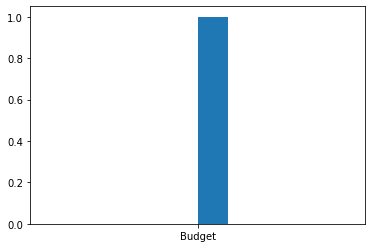

In [105]:
plt.hist('Budget')

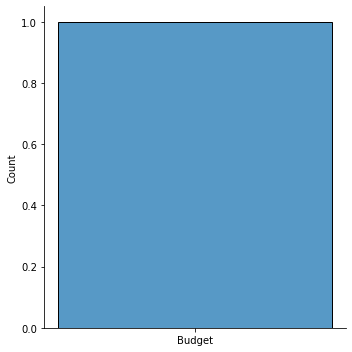

In [106]:
sns.displot('Budget')

In [107]:
bollywood_data['Budget'].mean()

29.44295302013423